# Power Transformer
### 1. Box-Cox Transformer
### 2. Yeo-Johnson Transformer

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Strength', axis =1),
                                                 df['Strength'],
                                                 test_size = 0.2,random_state = 23)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train,Y_train)

LinearRegression()

In [6]:
y_pred = lr_model.predict(X_test)
score = r2_score(y_pred,Y_test)
score


0.4732104921667072

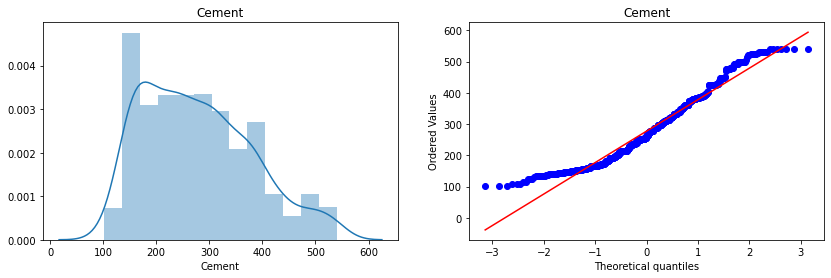

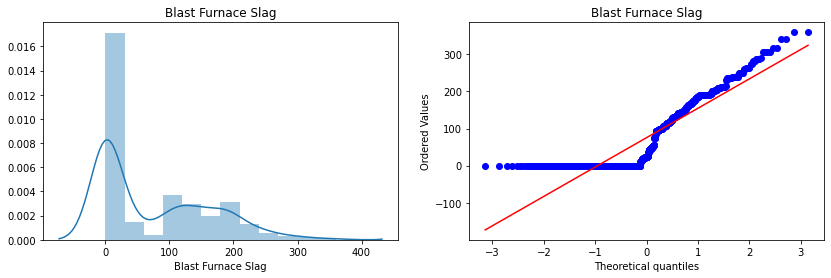

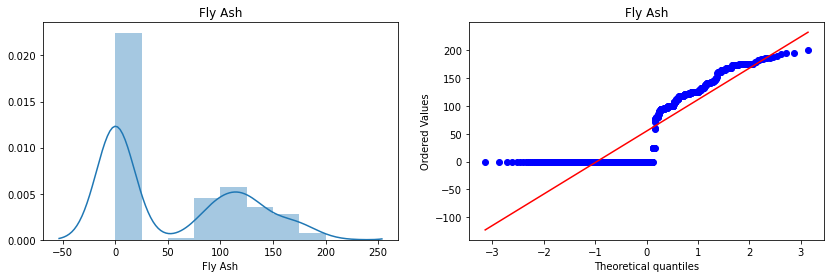

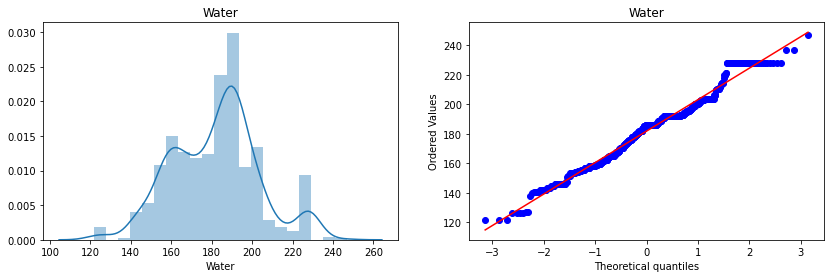

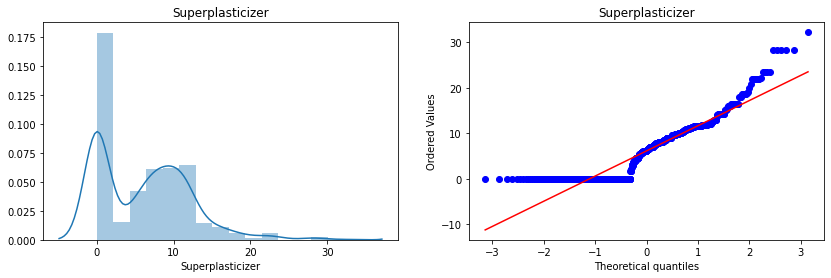

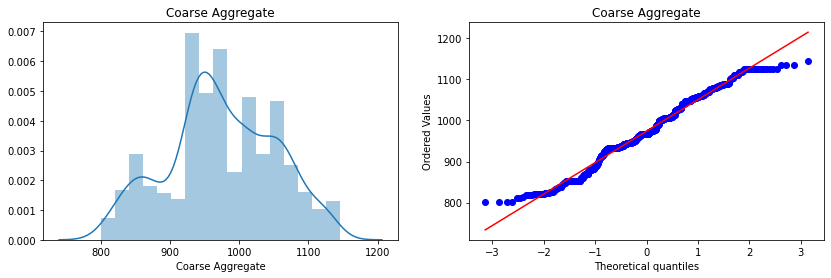

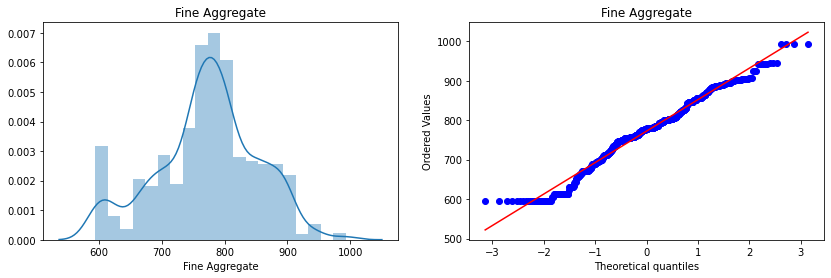

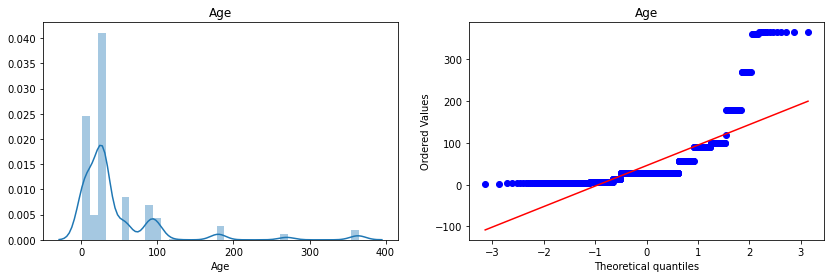

In [7]:
#plotting displot without any transformation
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

    

In [20]:
#Applying Box-Cox Transformation
trf1 = PowerTransformer(method='box-cox')

X_train_transformed = trf1.fit_transform(X_train+0.00001)
X_test_transformed  = trf1.transform(X_test+0.00001)



In [21]:
pd.DataFrame({'cols': X_train.columns,'lambda_col':trf1.lambdas_})

,cols,lambda_col
0,Cement,0.111496
1,Blast Furnace Slag,0.033941
2,Fly Ash,-0.035437
3,Water,0.742435
4,Superplasticizer,0.107191
5,Coarse Aggregate,1.265469
6,Fine Aggregate,1.765712
7,Age,0.048804


In [22]:
#Training model after applying transformation and compare scores
lr_model.fit(X_train_transformed,Y_train)

y_pred_transform = lr_model.predict(X_test_transformed)
score = r2_score(y_pred_transform,Y_test)
score

0.7802009609870644

In [27]:
trf2 = PowerTransformer(method='yeo-johnson')


In [31]:
X_train_transformed = trf2.fit_transform(X_train)
X_test_transformed  = trf2.transform(X_test)

In [29]:
# Comparing the values lambda for box-cox and yeo-Johnson transformer 

pd.DataFrame({'cols':X_train.columns,'lamda_cols_box_cox':trf1.lambdas_,'lamda_cols_Yeo_Johnson':trf2.lambdas_})

,cols,lamda_cols_box_cox,lamda_cols_Yeo_Johnson
0,Cement,0.111496,0.108501
1,Blast Furnace Slag,0.033941,0.032541
2,Fly Ash,-0.035437,-0.131175
3,Water,0.742435,0.740985
4,Superplasticizer,0.107191,0.244467
5,Coarse Aggregate,1.265469,1.265839
6,Fine Aggregate,1.765712,1.766769
7,Age,0.048804,0.001116


In [32]:
lr_model = LinearRegression()

lr_model.fit(X_train_transformed,Y_train)
y_pred_transform = lr_model.predict(X_test_transformed)
score = r2_score(y_pred_transform,Y_test)

score

0.7899831592139314